In [3]:
import orjson
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use("ggplot")
plt.rcParams["font.sans-serif"] = ["Maple Mono NF CN"]

In [4]:
with open("results/20260116_000130-full/reg.json", "rb") as f:
    data = orjson.loads(f.read())


In [5]:
info = data["info"]
adata_train_acc = np.array([item["pacr"]["train_acc"] for item in info])
adata_test_acc = np.array([item["pacr"]["test_acc"] for item in info])
adata_train_loss = np.array([item["pacr"]["train_loss"] for item in info])

odata_train_acc = np.array([item["no_pacr"]["train_acc"] for item in info])
odata_test_acc = np.array([item["no_pacr"]["test_acc"] for item in info])
odata_train_loss = np.array([item["no_pacr"]["train_loss"] for item in info])


In [6]:
np.mean(adata_train_acc[:, -1]), np.mean(odata_test_acc[:, -1])


(np.float64(0.6998304000000001), np.float64(0.650474))

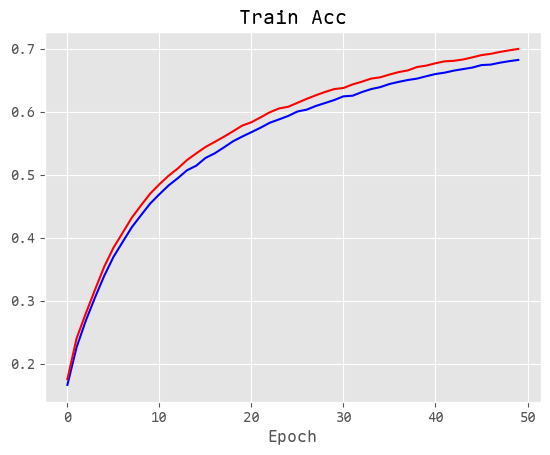

In [7]:
fig, ax = plt.subplots()
ax.plot(odata_train_acc.mean(axis=0), "b")
ax.plot(adata_train_acc.mean(axis=0), "r")
ax.set_xlabel("Epoch")
ax.set_title("Train Acc")
plt.show()


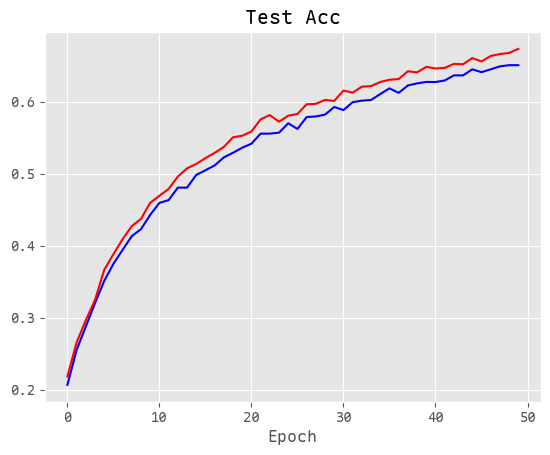

In [8]:
fig, ax = plt.subplots()
ax.plot(odata_test_acc.mean(axis=0), "b")
ax.plot(adata_test_acc.mean(axis=0), "r")
ax.set_xlabel("Epoch")
ax.set_title("Test Acc")
plt.show()


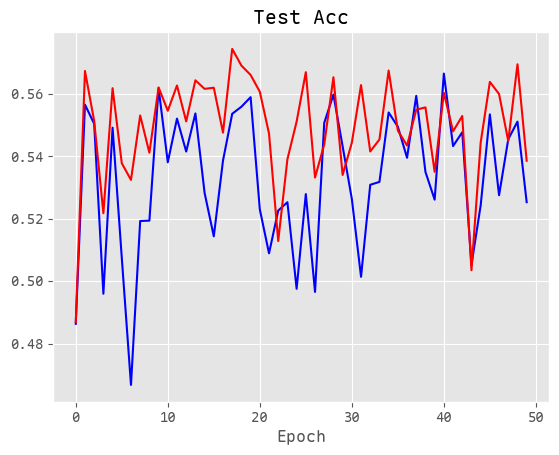

In [9]:
fig, ax = plt.subplots()
ax.plot(odata_test_acc.mean(axis=1), "b")
ax.plot(adata_test_acc.mean(axis=1), "r")
ax.set_xlabel("Epoch")
ax.set_title("Test Acc")
plt.show()


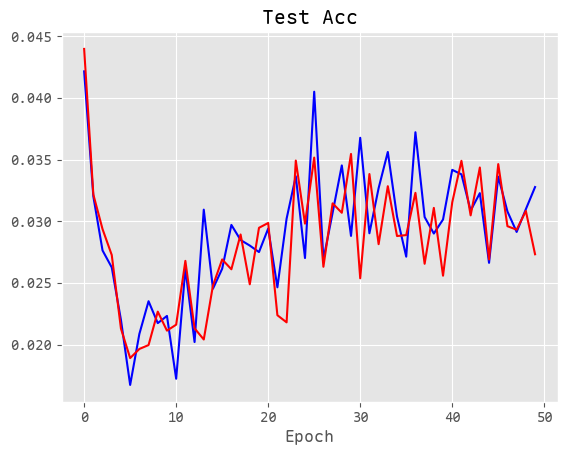

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.abs(odata_train_acc - odata_test_acc).mean(axis=0), "b")
ax.plot(np.abs(adata_train_acc - adata_test_acc).mean(axis=0), "r")
ax.set_xlabel("Epoch")
ax.set_title("Gap Acc")
plt.show()


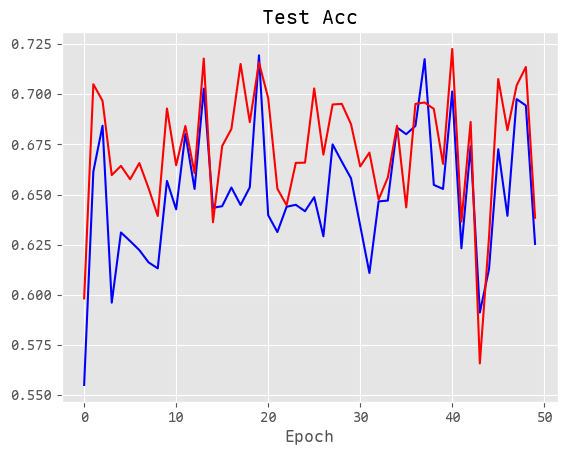

In [11]:
fig, ax = plt.subplots()
ax.plot(odata_test_acc[:, -1], "b")
ax.plot(adata_test_acc[:, -1], "r")
ax.set_xlabel("Epoch")
ax.set_title("Test Acc")
plt.show()


In [12]:
odata_test_acc[:, -1].mean(), adata_test_acc[:, -1].mean()

(np.float64(0.650474), np.float64(0.6729879999999998))

In [13]:
odata_test_acc[:, -1].std(), adata_test_acc[:, -1].std()

(np.float64(0.03222382230586559), np.float64(0.030693462756750018))

In [14]:
print(
    f"PACR Test Acc: {adata_test_acc[:, -1].mean():.4f} ± {adata_test_acc[:, -1].std():.4f} \n"
    f"No PACR Test Acc: {odata_test_acc[:, -1].mean():.4f} ± {odata_test_acc[:, -1].std():.4f}"
)

PACR Test Acc: 0.6730 ± 0.0307 
No PACR Test Acc: 0.6505 ± 0.0322


In [15]:
(odata_test_acc[:, -1] <= adata_test_acc[:, -1]).sum()


np.int64(45)

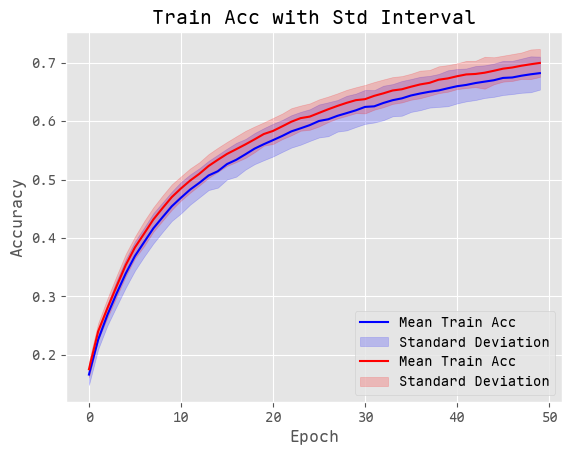

In [16]:
mean_curve_o = odata_train_acc.mean(axis=0)
std_curve_o = odata_train_acc.std(axis=0)
epochs = np.arange(len(mean_curve_o))

mean_curve_a = adata_train_acc.mean(axis=0)
std_curve_a = adata_train_acc.std(axis=0)
fig, ax = plt.subplots()

# 2. 绘制均值主曲线
ax.plot(epochs, mean_curve_o, color="b", label="Mean Train Acc")

# 3. 绘制标准差阴影区域
# mean_curve - std_curve 为下限，mean_curve + std_curve 为上限
# alpha 控制透明度，通常设置为 0.2 左右
ax.fill_between(
    epochs,
    mean_curve_o - std_curve_o,
    mean_curve_o + std_curve_o,
    color="b",
    alpha=0.2,
    label="Standard Deviation",
)

ax.plot(epochs, mean_curve_a, color="r", label="Mean Train Acc")

# 3. 绘制标准差阴影区域
# mean_curve - std_curve 为下限，mean_curve + std_curve 为上限
# alpha 控制透明度，通常设置为 0.2 左右
ax.fill_between(
    epochs,
    mean_curve_a - std_curve_a,
    mean_curve_a + std_curve_a,
    color="r",
    alpha=0.2,
    label="Standard Deviation",
)

ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_title("Train Acc with Std Interval")
ax.legend()
plt.show()


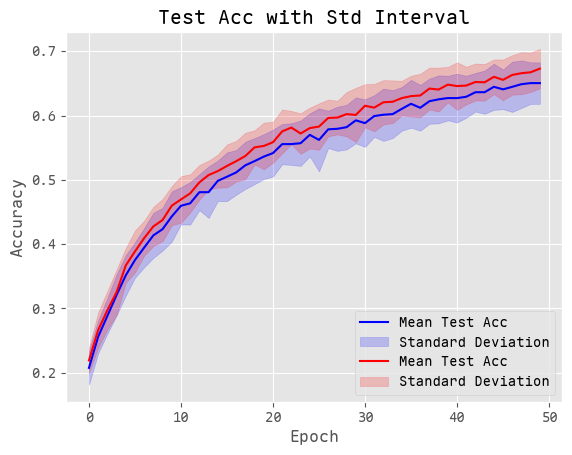

In [17]:
mean_curve_o = odata_test_acc.mean(axis=0)
std_curve_o = odata_test_acc.std(axis=0)
epochs = np.arange(len(mean_curve_o))

mean_curve_a = adata_test_acc.mean(axis=0)
std_curve_a = adata_test_acc.std(axis=0)
fig, ax = plt.subplots()

# 2. 绘制均值主曲线
ax.plot(epochs, mean_curve_o, color="b", label="Mean Test Acc")

# 3. 绘制标准差阴影区域
# mean_curve - std_curve 为下限，mean_curve + std_curve 为上限
# alpha 控制透明度，通常设置为 0.2 左右
ax.fill_between(
    epochs,
    mean_curve_o - std_curve_o,
    mean_curve_o + std_curve_o,
    color="b",
    alpha=0.2,
    label="Standard Deviation",
)

ax.plot(epochs, mean_curve_a, color="r", label="Mean Test Acc")

# 3. 绘制标准差阴影区域
# mean_curve - std_curve 为下限，mean_curve + std_curve 为上限
# alpha 控制透明度，通常设置为 0.2 左右
ax.fill_between(
    epochs,
    mean_curve_a - std_curve_a,
    mean_curve_a + std_curve_a,
    color="r",
    alpha=0.2,
    label="Standard Deviation",
)

ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_title("Test Acc with Std Interval")
ax.legend()
plt.show()


In [18]:
def calculate_cohen_d(group_a, group_o):
    """
    计算 Cohen's d 效应量
    group_a: adata_test_acc 的最后一列 (20,)
    group_o: odata_test_acc 的最后一列 (20,)
    """
    # 提取均值
    mu_a, mu_o = np.mean(group_a), np.mean(group_o)
    # 提取样本量
    n_a, n_o = len(group_a), len(group_o)
    # 计算无偏方差 (ddof=1)
    var_a, var_o = np.var(group_a, ddof=1), np.var(group_o, ddof=1)

    # 计算合并标准差 (Pooled Standard Deviation)
    pooled_std = np.sqrt(((n_a - 1) * var_a + (n_o - 1) * var_o) / (n_a + n_o - 2))

    # 计算 Cohen's d
    d = (mu_a - mu_o) / pooled_std
    return d


# 示例：假设您提取了最后一次 epoch 的结果
a_final = adata_test_acc[:, -1]
o_final = odata_test_acc[:, -1]
d_value = calculate_cohen_d(a_final, o_final)
print(f"Cohen's d 效应量为: {d_value:.4f}")


Cohen's d 效应量为: 0.7083


In [19]:
# 1. 提取最后一个 epoch 的结果 (假设形状为 20x50)
o_final = odata_test_acc[:, -1]
a_final = adata_test_acc[:, -1]

# 2. 执行配对样本 t 检验
# alternative='greater' 表示我们的假设是 A 的准确率大于 O
t_stat, p_val = stats.ttest_rel(a_final, o_final, alternative="greater")

# 3. 计算配对效应量 (Paired Cohen's d, 通常记作 dz)
# 公式: 差值的均值 / 差值的标准差
diffs = a_final - o_final
mean_diff = np.mean(diffs)
std_diff = np.std(diffs, ddof=1)
cohen_d_paired = mean_diff / std_diff

print("--- 配对实验分析结果 ---")
print(f"A 方法均值: {np.mean(a_final):.4f}")
print(f"O 方法均值: {np.mean(o_final):.4f}")
print(f"平均提升 (Mean Difference): {mean_diff:.4f}")
print(f"P 值 (单尾): {p_val:.2e}")
print(f"配对 Cohen's d (效应量): {cohen_d_paired:.4f}")

# 4. 统计学判定
alpha = 0.05
if p_val < alpha:
    print(f"\n判定结论：在 {alpha} 水平下，A 方法显著优于 O 方法！")
else:
    print("\n判定结论：未能证明 A 方法显著优于 O 方法。")


--- 配对实验分析结果 ---
A 方法均值: 0.6730
O 方法均值: 0.6505
平均提升 (Mean Difference): 0.0225
P 值 (单尾): 1.18e-09
配对 Cohen's d (效应量): 1.0310

判定结论：在 0.05 水平下，A 方法显著优于 O 方法！


In [20]:
# fig, ax = plt.subplots()
# ax.plot(oinfo["test_acc"])
# ax.plot(ainfo["test_acc"], "r")
# ax.set_xlabel("Epoch")
# ax.set_title("Test Acc")
# plt.show()


In [21]:
# np.mean(oinfo["test_acc"]), np.mean(ainfo["test_acc"])

In [22]:
# np.max(oinfo["test_acc"]), np.max(ainfo["test_acc"])


In [23]:
# oinfo["test_acc"][-1], ainfo["test_acc"][-1]